In [1]:
import os
import numpy as np
import pandas as pd
from surprise import Reader, Dataset
from surprise import SlopeOne
os.chdir('C:/Users/dimav/Desktop/pet_proj/Recommendation system of films/Data/')

In [2]:
df = pd.read_csv('ratings.csv', delimiter=',')
df = df.drop(['timestamp'], axis=1)

In [3]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

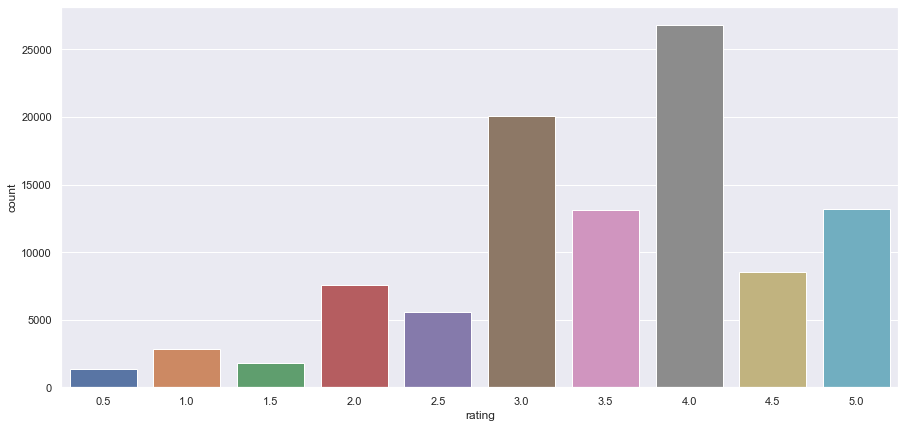

In [5]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.countplot(df['rating'])

In [6]:
real=df.groupby(['rating'])['userId'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()



In [7]:
real=df.groupby(['userId'])['rating'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()

In [8]:
df['userId'] = df['userId'].astype(str)
df['movieId'] = df['movieId'].astype(str)
df['userId'] = 'person_'+df['userId'].astype(str)
df['movieId'] = 'movie_'+df['movieId'].astype(str)

In [9]:
df_new=df.copy()
df=df.rename(columns={"movieId": "userId/movieId"})
df = df.pivot_table(index=['userId'], columns='userId/movieId', values='rating', aggfunc=np.sum).reset_index()
df.index=df['userId'].values
df=df.drop(['userId'], axis=1)

In [10]:
copy = df_new.copy()
df_new = df.copy()
df = copy.copy()
minimum_rating = min(df['rating'].values)
maximum_rating = max(df['rating'].values)
print(minimum_rating,maximum_rating)

0.5 5.0


In [11]:
reader = Reader(rating_scale=(minimum_rating,maximum_rating))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [12]:
slope = SlopeOne()
slope.fit(data.build_full_trainset())

C:\Users\dimav\AppData\Local\Temp/ipykernel_10656/1063358168.py:2: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [13]:
df_slope_one_new=df_new.copy()
for user in df_new.index:
    for movie in df_new.columns:
        if str(df_slope_one_new.loc[user, movie])=='nan':
            df_slope_one_new.at[user, movie] = round(slope.predict(user, movie).est,4)
df_slope_one_new

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1,4.0000,4.2665,3.5419,4.7950,4.0298,3.5708,3.7950,4.2070,3.1950,5.0000,...,3.5027,4.0773,3.1887,4.7391,3.7333,5.0000,4.0398,3.3216,4.2505,3.7333
person_10,3.7932,3.4834,2.3127,3.8600,2.5331,2.6999,2.8600,3.4484,2.3497,4.2435,...,2.3952,4.1566,3.6883,4.1068,3.1692,5.0000,3.1029,2.3889,3.2690,3.1692
person_100,4.2751,3.7771,3.1128,4.6126,3.7897,3.1162,3.6126,4.0494,2.9882,4.6732,...,3.3459,3.2107,2.7754,4.6255,3.4677,5.0000,3.6379,3.2844,4.1899,3.4677
person_101,3.9197,3.5873,2.8862,4.0240,3.1343,2.9484,3.0240,3.7927,2.4842,4.0018,...,2.9922,3.0574,2.9397,3.9080,3.0018,5.0000,3.2629,2.7717,3.4849,3.0018
person_102,3.9090,3.3154,2.8391,3.7460,3.2009,2.3268,2.7460,3.1071,2.4033,4.1071,...,2.5571,2.8571,2.5524,3.9716,3.1264,5.0000,3.0771,2.4454,3.5500,3.1264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_95,4.3654,4.0207,3.2481,4.7292,3.6030,3.3097,3.7292,3.9739,2.7553,5.0000,...,3.3089,4.1339,2.9411,4.4963,3.7142,5.0000,3.7438,3.0982,3.8718,3.7142
person_96,5.0000,3.5517,2.8445,4.5513,3.5151,2.9065,3.5513,3.5096,2.6335,5.0000,...,3.0939,3.8156,2.3312,4.0985,3.1488,5.0000,3.4180,2.7664,3.5540,3.1488
person_97,4.6108,4.3289,3.7668,4.8373,4.1528,3.8254,3.8373,4.6759,3.2735,5.0000,...,3.4444,4.1111,3.5126,4.8876,3.9875,4.6944,4.2156,3.3909,4.2449,3.9875
person_98,4.5000,3.8381,2.8867,4.3184,2.9130,3.4561,3.3184,3.9539,2.8841,5.0000,...,3.0510,5.0000,3.6422,4.5629,3.4242,5.0000,3.4326,2.8773,3.8154,3.4242


manual

In [14]:
df=df.rename(columns={"movieId": "userId/movieId"})

In [15]:
df = df.pivot_table(index=['userId'], columns='userId/movieId', values='rating', aggfunc=np.sum).reset_index()
df.index=df['userId'].values
df=df.drop(['userId'], axis=1)
df

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_96,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_98,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def slope_one(target_surname, df):
    my_values = df.loc[target_surname,:].copy()

    film_nas = my_values[my_values.astype(str)=='nan'].index
    film_nonas = my_values[my_values.astype(str)!='nan'].index
    my_values_nonas = pd.DataFrame(my_values[my_values.astype(str)!='nan']).reset_index()
    my_values_nonas = my_values_nonas.rename(columns={"userId/movieId": "movie_id", target_surname: "rating"})

    dfc = pd.DataFrame(df.columns).copy()
    i_nas = dfc[dfc['userId/movieId'].isin(film_nas)].index
    i_nonas = dfc[dfc['userId/movieId'].isin(film_nonas)].index

    df = df.drop([target_surname], axis=0)
    my_values = my_values.values.tolist()
    l_board=0.5
    u_board=5.0

    pred_nas=[]

    for ina in i_nas:
        film_na = df.columns[ina]
        indexes = df[df[film_na].astype(str)!='nan'].index

        df_copy=df.loc[indexes,:].copy()
        df_copy0=pd.DataFrame(df_copy[film_na].copy()).reset_index()
        df_copy0=df_copy0.rename(columns={"index": "person_id", film_na: "rating_na"})
        df_copy=df_copy[film_nonas].copy().reset_index()
        df_copy=df_copy.rename(columns={"index": "person_id"})

        lc = len(df_copy.columns)
        df_copy = pd.melt(df_copy, id_vars=['person_id'], value_vars = df_copy.columns[1:lc],
                        var_name='movie_id', value_name='rating_nona')
        df_copy = df_copy[df_copy['rating_nona'].astype(str)!='nan'].copy()
        df_copy.reset_index(drop=True, inplace=True)

        df_copy=df_copy.merge(df_copy0, how='left', on=['person_id'])
        df_copy['dev']=df_copy['rating_na']-df_copy['rating_nona']
        df_copy=df_copy.drop(['rating_na','rating_nona'], axis=1)

        df_copy=df_copy.groupby(['movie_id'])['dev'].mean().reset_index()

        df_copy=df_copy.merge(my_values_nonas, how='left', on='movie_id')
        df_copy['final_rating'] = df_copy['rating'] + df_copy['dev']
        df_copy = df_copy.drop(['rating','dev'], axis=1)

        pred = round(df_copy['final_rating'].mean(),4)

        if str(pred)=='nan':
            pred=0.5
        elif pred<l_board:
            pred=0.5
        elif pred>u_board:
            pred=5

        pred_nas.append(pred)

    my_values_pred=my_values.copy()
    for i in range(len(pred_nas)):
        my_values_pred[i_nas[i]]=pred_nas[i]

    df_new = pd.DataFrame([my_values_pred])
    df_new.columns = df.columns
    df_new.index = [(target_surname+' (slope one)')]
    df_new = pd.concat([df, df_new], axis=0)
    
    return(df_new)

In [17]:
df_slope_one=df.copy()
for k, target_surname in enumerate(df.index[0:5]):
    df_slope_one=slope_one(target_surname=target_surname, df=df_slope_one)
    print('Iteration ',(k+1),' of ',len(df.index[0:5]),' --> COMPLETE')

Iteration  1  of  5  --> COMPLETE
Iteration  2  of  5  --> COMPLETE
Iteration  3  of  5  --> COMPLETE
Iteration  4  of  5  --> COMPLETE
Iteration  5  of  5  --> COMPLETE


In [18]:
df_slope_one_small = df_slope_one.loc[
                        df_slope_one.index[
                            (df_slope_one.shape[0]-5):
                            df_slope_one.shape[0]
                        ],
                    ].copy()

In [19]:
df_slope_one_small

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1 (slope one),4.0000,4.3089,3.3861,4.6429,4.2644,3.7036,4.1429,4.6304,3.3701,5.0000,...,3.8125,4.4180,3.1623,4.6060,3.7050,5.0000,4.0032,3.4810,4.0299,3.7050
person_10 (slope one),3.6111,3.4040,2.3730,3.6877,3.2415,2.7370,3.1877,3.7164,2.4891,4.1055,...,2.8453,3.6131,2.3079,3.8104,2.7976,4.0942,3.0303,2.5679,3.1365,2.7976
person_100 (slope one),4.2216,3.8416,2.9830,4.2965,3.9074,3.3346,3.7965,4.3099,3.0537,4.6995,...,3.4672,4.1071,2.8331,4.3650,3.3777,4.7402,3.5858,3.1802,3.7527,3.3777
person_101 (slope one),3.8772,3.6287,2.7012,4.0598,3.6306,3.1007,3.5598,4.0687,2.7629,4.4469,...,3.2325,3.8749,2.6458,4.0262,3.1221,4.4809,3.2967,2.9248,3.4391,3.1221
person_102 (slope one),3.8798,3.3626,2.7254,3.9451,3.5542,3.0031,3.4451,3.9679,2.6697,4.3689,...,3.1307,3.7854,2.5475,3.9295,3.0548,4.3936,3.1443,2.7968,3.3690,3.0548


In [20]:
df_slope_one_small.max().max()

5.0

In [21]:
df_slope_one_small.min().min()

0.5

In [22]:
df_slope_one_small.apply(lambda x: sum(x.isnull()), axis=0).unique()

array([0], dtype=int64)